<a href="https://colab.research.google.com/github/CynieC/Avatar2_Sentiment_Analysis/blob/main/Sentiment_Analysis_Avatar2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To install libraries**





In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**To import necessary libraries**

In [ ]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from PIL import Image
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS


In [ ]:
tweepy .__version__

'3.10.0'

**Access keys and codes from Twitter Developer Account**

In [ ]:
api_key = 'XXXXXXXXXXXXXXXXXX'
api_key_secret = 'XXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXX'
access_token_secret = 'XXXXXXXXXXXXXXXXX'

**Passing the Twitter API aunthetication keys**

In [ ]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True) 
sleep_on_rate_limit=False

**Create the hashtags and keywords for the tweets to be scraped**

In [ ]:
keywords = "#Avatar OR #AvatarTheWayOfWater"
search_query = keywords + " -filter:retweets AND -filter:replies"


**Create a function of the tweets and append it to data**

In [ ]:
#create a function of the tweets and append to data
avatar = [] 

def get_tweets(search_query, limit):
    tweets = tweepy.Cursor (api.search, q=search_query, count = 100, lang = 'en', tweet_mode= 'extended').items(limit)
    for tweet in tweets:
        avatar.append([tweet.id, 
        tweet.user.screen_name, 
        tweet.full_text,        
        tweet.favorite_count,  
        tweet.retweet_count,    
        tweet.user.location,   
        tweet.created_at])    
        #print(tweet)
        
get_tweets(search_query, 100000)  

#Assign names to each column and print the df
avatar2 = pd.DataFrame(avatar, columns = ['User_Id','Username', 'Tweet', 'No. of Likes', 'No. of Retweets', 'Location', 'Date'])
print(avatar2)

                   User_Id        Username  \
0      1616337356201594881   landrocker_io   
1      1616336522781036544       MovieCrow   
2      1616335657106014210    KotaCityBlog   
3      1616332320746737664  SouthGenerator   
4      1616331304995540997        kvxzmdzs   
...                    ...             ...   
10515  1612684245302120449  paulhinesvault   
10516  1612683280846839808   DCLNameClaims   
10517  1612683212081467393        Vijayrrg   
10518  1612683166283595777   AvatarInFrame   
10519  1612682459598004224     MojHakimi_1   

                                                   Tweet  No. of Likes  \
0      And now see the previous concept's 3D model an...             0   
1      Multiplexes #PVR, Cinepolis, Miraj offer subsi...             1   
2      😱😻\n\nWatch the latest hits @ 99 INR in Cinema...             0   
3      What are your thoughts on this picture? #South...             0   
4      BRING NETEYAM BACK #AvatarTheWayOfWater https:...             0   
...

In [ ]:
print(avatar2.tail())

                   User_Id        Username  \
10515  1612684245302120449  paulhinesvault   
10516  1612683280846839808   DCLNameClaims   
10517  1612683212081467393        Vijayrrg   
10518  1612683166283595777   AvatarInFrame   
10519  1612682459598004224     MojHakimi_1   

                                                   Tweet  No. of Likes  \
10515  It's About Black People Says Director of Avata...             0   
10516  Unknown DCL name (https://t.co/k2sSVOQTqu) was...             1   
10517  Avatar: The Way of Water in IMAX 3D. #AvatarTh...             0   
10518  Avatar (2009)\n\nFrame 12144 of 245854\n\nTime...             1   
10519  See different styles of boys in the 🌟NiceBoy🌟 ...             7   

       No. of Retweets                        Location                Date  
10515                0  Petersburg, Florida, US 33702  2023-01-10 05:34:20  
10516                0                   The Metaverse 2023-01-10 05:30:31  
10517                0                Bengaluru

Get older tweets using max_id 

In [ ]:
avatar = []

def get_tweets2(search_query, limit):
    tweets = tweepy.Cursor(api.search, q=search_query, max_id = XXXXXXXXXXXX,count = 100, lang = 'en', tweet_mode= 'extended').items(limit)
    for tweet in tweets:
        avatar.append([tweet.id,
        tweet.user.screen_name,
        tweet.full_text,
        tweet.favorite_count, 
        tweet.retweet_count,
        tweet.user.location,
        tweet.created_at])
        #print(tweet)
        
#  Pass in search query and the number of tweets to retrieve
get_tweets2(search_query, 50000)  

#Assign names to each column and print the df
avatar3 = pd.DataFrame(avatar, columns = ['User_Id','Username', 'Tweet', 'No. of Likes', 'No. of Retweets', 'Location', 'Date'])
print(avatar3)

Empty DataFrame
Columns: [User_Id, Username, Tweet, No. of Likes, No. of Retweets, Location, Date]
Index: []


In [ ]:
# Define a function to extract hashtags and remove # with re
def getHashtags(tweet):
    tweet = tweet.lower()  #to reduce the tweets to lowercase
    tweet = re.findall(r'\#\w+',tweet) #find all words with # at the start, ie; hashtags
    return " ".join(tweet)

#apply the function to the Tweet column to extract the hashtags
avatar2['Hashtags'] = avatar2['Tweet'].apply(getHashtags)
avatar2.head()

hashtags_list = avatar2['Hashtags'].tolist() #to convert the data elements into a list

# Iterate over all hashtags and split where there is more than one hashtag
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

# Determine count of all hashtags used
counts = Counter(hashtags)
hashtags_avatar2 = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_avatar2.columns = ['Hashtags', 'Count']
hashtags_avatar2.sort_values(by='Count', ascending=False, inplace=True)

#print hashtags_df
hashtags_avatar2

,Hashtags,Count
7,#avatar,7344
20,#avatarthewayofwater,6369
49,#avatar2,2606
50,#jamescameron,2402
32,#notint,356
...,...,...
3176,#sundaymotivation,1
3177,#fluff,1
3178,#thenvsnow,1
3179,#soundscape,1


In [ ]:
#Avatar2_cast = ["Jake","Neytiri","Neteyam","Aonung","Tuktirey","Lo'ak","Tonowari","Kiri Sully","Ronal","General", Ardmore","Spider","Rotxo","Tsireya","Tuk","Garvin"]


In [ ]:
#I created a group for the first names of the actors and their respective character names. Surnames were used to avoid duplicates
Avatar2_cast = "Sam|Jake|Zoe|Neytiri|Sigourney|Kiri|Kate|Quaritch|Stephen|Tonowari|Cliff|Spider|Neteyam|Jamie|Tuk|Trinity|Tsireya|Bailey|Rotxo|Duane|Filip|Aonung|Britain|Lo'ak|General|CCH|Mo'at"
# Define function to extract casts from each Tweet
def getCast(tweet):
    tweet = tweet.lower()  
    tweet = re.findall(Avatar2_cast, tweet, flags=re.IGNORECASE)
    return " ".join(tweet)

#Extract casts to a new column
avatar2['Movie_cast'] = avatar2['Tweet'].apply(getCast)
avatar2

,User_Id,Username,Tweet,No. of Likes,No. of Retweets,Location,Date,Hashtags,Movie_cast
0,1616337356201594881,landrocker_io,And now see the previous concept's 3D model an...,0,0,"Dubai, United Arab Emirates",2023-01-20 07:30:30,#landrocker #metaverse #p2e #web3 #nft #blockc...,
1,1616336522781036544,MovieCrow,"Multiplexes #PVR, Cinepolis, Miraj offer subsi...",1,0,,2023-01-20 07:27:11,#pvr #cinemaloversday #lovetoday #avatar #puss...,
2,1616335657106014210,KotaCityBlog,😱😻\n\nWatch the latest hits @ 99 INR in Cinema...,0,0,"Kota, India",2023-01-20 07:23:45,#cinemaloversday #cinemalovers #drishyam2 #ava...,
3,1616332320746737664,SouthGenerator,What are your thoughts on this picture? #South...,0,0,,2023-01-20 07:10:29,#southpark #avatar #generator #back #torso #sh...,
4,1616331304995540997,kvxzmdzs,BRING NETEYAM BACK #AvatarTheWayOfWater https:...,0,0,mentally in a bts concert,2023-01-20 07:06:27,#avatarthewayofwater,neteyam
...,...,...,...,...,...,...,...,...,...
10515,1612684245302120449,paulhinesvault,It's About Black People Says Director of Avata...,0,0,"Petersburg, Florida, US 33702",2023-01-10 05:34:20,#avatar #avatar2,
10516,1612683280846839808,DCLNameClaims,Unknown DCL name (https://t.co/k2sSVOQTqu) was...,1,0,The Metaverse,2023-01-10 05:30:31,#decentraland #names #avatar,
10517,1612683212081467393,Vijayrrg,Avatar: The Way of Water in IMAX 3D. #AvatarTh...,0,0,"Bengaluru, India",2023-01-10 05:30:14,#avatarthewayofwater,
10518,1612683166283595777,AvatarInFrame,Avatar (2009)\n\nFrame 12144 of 245854\n\nTime...,1,0,,2023-01-10 05:30:03,#avatar #avatar2 #avatarthewayofwater #jamesca...,


In [ ]:
#create a function to replace their actual names with the character names
def castNames(avatar2_cast):
    replacements = [("Sigourney", "kiri"),
                    ("Colonel", "quaritch"),
                    ("Stephen", "quaritch"),
                    ("Loak", "lo'ak"),
                    ("Dalton", "lo'ak"),
                    ("Zoe", "neytiri"),
                    ("Jack", "spider"), 
                    ("Britain", "lo'ak"), 
                    ("Trinity", "tuk"),
                    ("Trinity", "tuktirey"),
                    ("Cliff", "tonowari"), 
                    ("Edie", "General"),
                    ("Jamie", "neteyam"),
                    ("Duane", "rotxo"), 
                    ("Bailey", "tsireya"), 
                    ("Filip", "aonung"),
                    ("Pounder", "mo'at"),
                    ("Joel", "norm"),
                    ("Kate", "ronal")]
    for act,rep in replacements:
        avatar2_cast = re.sub(act, rep, avatar2_cast, flags=re.IGNORECASE)
    return avatar2_cast

avatar2['Movie_cast'] = avatar2['Movie_cast'].apply(castNames)
avatar2

,User_Id,Username,Tweet,No. of Likes,No. of Retweets,Location,Date,Hashtags,Movie_cast
0,1616337356201594881,landrocker_io,And now see the previous concept's 3D model an...,0,0,"Dubai, United Arab Emirates",2023-01-20 07:30:30,#landrocker #metaverse #p2e #web3 #nft #blockc...,
1,1616336522781036544,MovieCrow,"Multiplexes #PVR, Cinepolis, Miraj offer subsi...",1,0,,2023-01-20 07:27:11,#pvr #cinemaloversday #lovetoday #avatar #puss...,
2,1616335657106014210,KotaCityBlog,😱😻\n\nWatch the latest hits @ 99 INR in Cinema...,0,0,"Kota, India",2023-01-20 07:23:45,#cinemaloversday #cinemalovers #drishyam2 #ava...,
3,1616332320746737664,SouthGenerator,What are your thoughts on this picture? #South...,0,0,,2023-01-20 07:10:29,#southpark #avatar #generator #back #torso #sh...,
4,1616331304995540997,kvxzmdzs,BRING NETEYAM BACK #AvatarTheWayOfWater https:...,0,0,mentally in a bts concert,2023-01-20 07:06:27,#avatarthewayofwater,neteyam
...,...,...,...,...,...,...,...,...,...
10515,1612684245302120449,paulhinesvault,It's About Black People Says Director of Avata...,0,0,"Petersburg, Florida, US 33702",2023-01-10 05:34:20,#avatar #avatar2,
10516,1612683280846839808,DCLNameClaims,Unknown DCL name (https://t.co/k2sSVOQTqu) was...,1,0,The Metaverse,2023-01-10 05:30:31,#decentraland #names #avatar,
10517,1612683212081467393,Vijayrrg,Avatar: The Way of Water in IMAX 3D. #AvatarTh...,0,0,"Bengaluru, India",2023-01-10 05:30:14,#avatarthewayofwater,
10518,1612683166283595777,AvatarInFrame,Avatar (2009)\n\nFrame 12144 of 245854\n\nTime...,1,0,,2023-01-10 05:30:03,#avatar #avatar2 #avatarthewayofwater #jamesca...,


In [ ]:
#convert the avatar2 to a list
actors_list = avatar2['Movie_cast'].tolist()

# Iterate over all cast names and split where there is more than one cast
actors = []
for item in actors_list:
    item = item.split()
    for i in item:
        actors.append(i)

# Determine count of all actors
counts = Counter(actors)
actors_avatar2 = pd.DataFrame.from_dict(counts, orient='index').reset_index()
actors_avatar2.columns = ['actors', 'Count']
actors_avatar2.sort_values(by='Count', ascending=False, inplace=True)

actors_avatar2

,actors,Count
0,neteyam,518
2,jake,391
3,neytiri,346
5,quaritch,336
1,spider,256
4,aonung,233
8,kiri,220
9,tsireya,167
10,sam,136
6,tuk,113


In [ ]:
#create a function to clean the tweets, ie; get rid of @, RT, numbers, url and so on
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #to remove @ mentions, + means 1 or more
    text = re.sub(r'[#:_\!/]', '', text) #to remove symbols
    text = re.sub(r'RT[\s]+', '', text) #to remove RT mentions. [\s] means 1 or more white spaces
    text = re.sub(r'https?:\/\/\+S', '', text) #remove hyperlinks. s? means may or may not have an s. +S = may have whitespaces 
    text = re.sub(r'httpst', '', text)
    
    return text

#apply function to the Tweet column
avatar2['Tweet'] = avatar2['Tweet'].apply(cleanTxt)

avatar2

,User_Id,Username,Tweet,No. of Likes,No. of Retweets,Location,Date,Hashtags,Movie_cast
0,1616337356201594881,landrocker_io,And now see the previous concept's 3D model an...,0,0,"Dubai, United Arab Emirates",2023-01-20 07:30:30,#landrocker #metaverse #p2e #web3 #nft #blockc...,
1,1616336522781036544,MovieCrow,"Multiplexes PVR, Cinepolis, Miraj offer subsid...",1,0,,2023-01-20 07:27:11,#pvr #cinemaloversday #lovetoday #avatar #puss...,
2,1616335657106014210,KotaCityBlog,😱😻\n\nWatch the latest hits @ 99 INR in Cinema...,0,0,"Kota, India",2023-01-20 07:23:45,#cinemaloversday #cinemalovers #drishyam2 #ava...,
3,1616332320746737664,SouthGenerator,What are your thoughts on this picture? SouthP...,0,0,,2023-01-20 07:10:29,#southpark #avatar #generator #back #torso #sh...,
4,1616331304995540997,kvxzmdzs,BRING NETEYAM BACK AvatarTheWayOfWater .co2g9h...,0,0,mentally in a bts concert,2023-01-20 07:06:27,#avatarthewayofwater,neteyam
...,...,...,...,...,...,...,...,...,...
10515,1612684245302120449,paulhinesvault,It's About Black People Says Director of Avata...,0,0,"Petersburg, Florida, US 33702",2023-01-10 05:34:20,#avatar #avatar2,
10516,1612683280846839808,DCLNameClaims,Unknown DCL name (.cok2sSVOQTqu) was created ...,1,0,The Metaverse,2023-01-10 05:30:31,#decentraland #names #avatar,
10517,1612683212081467393,Vijayrrg,Avatar The Way of Water in IMAX 3D. AvatarTheW...,0,0,"Bengaluru, India",2023-01-10 05:30:14,#avatarthewayofwater,
10518,1612683166283595777,AvatarInFrame,Avatar (2009)\n\nFrame 12144 of 245854\n\nTime...,1,0,,2023-01-10 05:30:03,#avatar #avatar2 #avatarthewayofwater #jamesca...,


Check for null values 

In [ ]:
avatar2.isnull().sum()

User_Id            0
Username           0
Tweet              0
No. of Likes       0
No. of Retweets    0
Location           0
Date               0
Hashtags           0
Movie_cast         0
dtype: int64

Drop columns 

In [ ]:
avatar2.drop(["User_Id"], axis = 1)

,Username,Tweet,No. of Likes,No. of Retweets,Location,Date,Hashtags,Movie_cast
0,landrocker_io,And now see the previous concept's 3D model an...,0,0,"Dubai, United Arab Emirates",2023-01-20 07:30:30,#landrocker #metaverse #p2e #web3 #nft #blockc...,
1,MovieCrow,"Multiplexes PVR, Cinepolis, Miraj offer subsid...",1,0,,2023-01-20 07:27:11,#pvr #cinemaloversday #lovetoday #avatar #puss...,
2,KotaCityBlog,😱😻\n\nWatch the latest hits @ 99 INR in Cinema...,0,0,"Kota, India",2023-01-20 07:23:45,#cinemaloversday #cinemalovers #drishyam2 #ava...,
3,SouthGenerator,What are your thoughts on this picture? SouthP...,0,0,,2023-01-20 07:10:29,#southpark #avatar #generator #back #torso #sh...,
4,kvxzmdzs,BRING NETEYAM BACK AvatarTheWayOfWater .co2g9h...,0,0,mentally in a bts concert,2023-01-20 07:06:27,#avatarthewayofwater,neteyam
...,...,...,...,...,...,...,...,...
10515,paulhinesvault,It's About Black People Says Director of Avata...,0,0,"Petersburg, Florida, US 33702",2023-01-10 05:34:20,#avatar #avatar2,
10516,DCLNameClaims,Unknown DCL name (.cok2sSVOQTqu) was created ...,1,0,The Metaverse,2023-01-10 05:30:31,#decentraland #names #avatar,
10517,Vijayrrg,Avatar The Way of Water in IMAX 3D. AvatarTheW...,0,0,"Bengaluru, India",2023-01-10 05:30:14,#avatarthewayofwater,
10518,AvatarInFrame,Avatar (2009)\n\nFrame 12144 of 245854\n\nTime...,1,0,,2023-01-10 05:30:03,#avatar #avatar2 #avatarthewayofwater #jamesca...,


**SENTIMENT ANALYSIS**

In [ ]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
avatar2['Subjectivity'] = avatar2['Tweet'].apply(getSubjectivity)
avatar2['Polarity'] = avatar2['Tweet'].apply(getPolarity)

#Show the new dataframe with the new columns
avatar2

,User_Id,Username,Tweet,No. of Likes,No. of Retweets,Location,Date,Hashtags,Movie_cast,Subjectivity,Polarity
0,1616337356201594881,landrocker_io,And now see the previous concept's 3D model an...,0,0,"Dubai, United Arab Emirates",2023-01-20 07:30:30,#landrocker #metaverse #p2e #web3 #nft #blockc...,,0.333333,0.166667
1,1616336522781036544,MovieCrow,"Multiplexes PVR, Cinepolis, Miraj offer subsid...",1,0,,2023-01-20 07:27:11,#pvr #cinemaloversday #lovetoday #avatar #puss...,,0.000000,0.000000
2,1616335657106014210,KotaCityBlog,😱😻\n\nWatch the latest hits @ 99 INR in Cinema...,0,0,"Kota, India",2023-01-20 07:23:45,#cinemaloversday #cinemalovers #drishyam2 #ava...,,0.900000,0.500000
3,1616332320746737664,SouthGenerator,What are your thoughts on this picture? SouthP...,0,0,,2023-01-20 07:10:29,#southpark #avatar #generator #back #torso #sh...,,0.166667,0.083333
4,1616331304995540997,kvxzmdzs,BRING NETEYAM BACK AvatarTheWayOfWater .co2g9h...,0,0,mentally in a bts concert,2023-01-20 07:06:27,#avatarthewayofwater,neteyam,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
10515,1612684245302120449,paulhinesvault,It's About Black People Says Director of Avata...,0,0,"Petersburg, Florida, US 33702",2023-01-10 05:34:20,#avatar #avatar2,,0.433333,-0.166667
10516,1612683280846839808,DCLNameClaims,Unknown DCL name (.cok2sSVOQTqu) was created ...,1,0,The Metaverse,2023-01-10 05:30:31,#decentraland #names #avatar,,0.600000,-0.100000
10517,1612683212081467393,Vijayrrg,Avatar The Way of Water in IMAX 3D. AvatarTheW...,0,0,"Bengaluru, India",2023-01-10 05:30:14,#avatarthewayofwater,,0.000000,0.000000
10518,1612683166283595777,AvatarInFrame,Avatar (2009)\n\nFrame 12144 of 245854\n\nTime...,1,0,,2023-01-10 05:30:03,#avatar #avatar2 #avatarthewayofwater #jamesca...,,0.000000,0.000000


In [ ]:
#Create a function to get the polarity(negative, neutral, positive) sentiments
def getSentiments(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
#create a new column to save the sentiments
avatar2['Sentiments'] = avatar2['Polarity'].apply(getSentiments)

#Show the dataframe
avatar2

,User_Id,Username,Tweet,No. of Likes,No. of Retweets,Location,Date,Hashtags,Movie_cast,Subjectivity,Polarity,Sentiments
0,1616337356201594881,landrocker_io,And now see the previous concept's 3D model an...,0,0,"Dubai, United Arab Emirates",2023-01-20 07:30:30,#landrocker #metaverse #p2e #web3 #nft #blockc...,,0.333333,0.166667,Positive
1,1616336522781036544,MovieCrow,"Multiplexes PVR, Cinepolis, Miraj offer subsid...",1,0,,2023-01-20 07:27:11,#pvr #cinemaloversday #lovetoday #avatar #puss...,,0.000000,0.000000,Neutral
2,1616335657106014210,KotaCityBlog,😱😻\n\nWatch the latest hits @ 99 INR in Cinema...,0,0,"Kota, India",2023-01-20 07:23:45,#cinemaloversday #cinemalovers #drishyam2 #ava...,,0.900000,0.500000,Positive
3,1616332320746737664,SouthGenerator,What are your thoughts on this picture? SouthP...,0,0,,2023-01-20 07:10:29,#southpark #avatar #generator #back #torso #sh...,,0.166667,0.083333,Positive
4,1616331304995540997,kvxzmdzs,BRING NETEYAM BACK AvatarTheWayOfWater .co2g9h...,0,0,mentally in a bts concert,2023-01-20 07:06:27,#avatarthewayofwater,neteyam,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
10515,1612684245302120449,paulhinesvault,It's About Black People Says Director of Avata...,0,0,"Petersburg, Florida, US 33702",2023-01-10 05:34:20,#avatar #avatar2,,0.433333,-0.166667,Negative
10516,1612683280846839808,DCLNameClaims,Unknown DCL name (.cok2sSVOQTqu) was created ...,1,0,The Metaverse,2023-01-10 05:30:31,#decentraland #names #avatar,,0.600000,-0.100000,Negative
10517,1612683212081467393,Vijayrrg,Avatar The Way of Water in IMAX 3D. AvatarTheW...,0,0,"Bengaluru, India",2023-01-10 05:30:14,#avatarthewayofwater,,0.000000,0.000000,Neutral
10518,1612683166283595777,AvatarInFrame,Avatar (2009)\n\nFrame 12144 of 245854\n\nTime...,1,0,,2023-01-10 05:30:03,#avatar #avatar2 #avatarthewayofwater #jamesca...,,0.000000,0.000000,Neutral


**To load the image file and link with Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**To generate the Wordcloud**




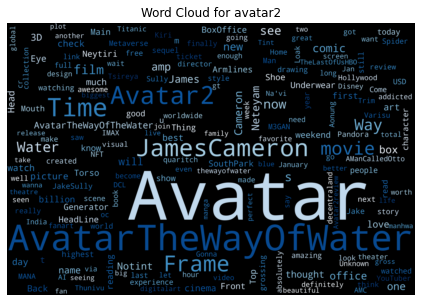

In [ ]:
#plot the wordcloud
avatar_wc = np.array(Image.open("/content/drive/MyDrive/AVATAR2.png"))

#Instantiate the wordcloud using
allwords = ' '.join(avatar2['Tweet'])
wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color="black",
    height = 2000,
    width = 3000,
    #avatar_wc = avatar_wc,
    colormap = 'Blues',
    collocations = False,
    max_font_size = 500).generate(allwords)

# create Avatar Way of the water image
plt.figure(figsize=[10,5], facecolor='none')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for avatar2')
plt.savefig("avatar2.png", format="png")
plt.show()

**To store the files in CSV format**

In [ ]:
avatar2.to_csv('Avatar2.csv')

hashtags_avatar2.to_csv('hashtags_avatar2.csv')

actors_avatar2.to_csv('actors_avatar2.csv')



Data Visualisation

In [ ]:
#Exported the csv files to PowerBI for analysis